# Regresión lineal - Implementación con datos reales

## Formula 

$ y = \theta_0 + \theta_1 x + \theta_2 x^2$

In [1]:
# Librerias

import matplotlib.pyplot as plt
import numpy as np

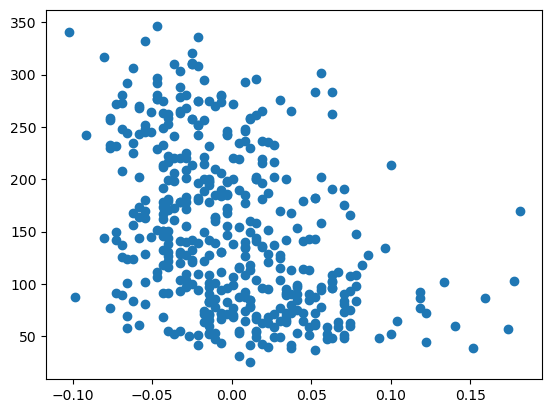

In [2]:
# Datos
from sklearn import datasets
xT, y = datasets.load_diabetes(return_X_y=True)
x = xT[:,6]
m = x.size
plt.plot(x,y,'o')


In [3]:
# Normalizar datos
X=(x-min(x))/(max(x)-min(x)) 
Y=(y-min(y))/(max(y)-min(y))

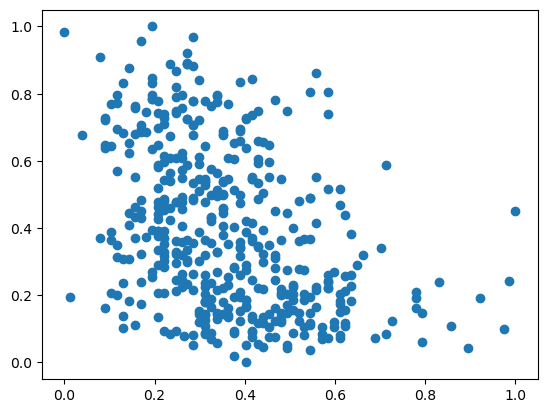

In [4]:
plt.plot(X,Y,'o')

In [5]:
# Inicializar

theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()
alpha    = 0.1  # Tasa de aprendizaje 
maxItera = 100000
i        = 0     

#para observar el progreso de los parametros abajo 
log0,log1,log2=np.array([theta0]),np.array([theta1]),np.array([theta2]) 

#para graficar el error cuadratico medio abajo
logE=np.array([])

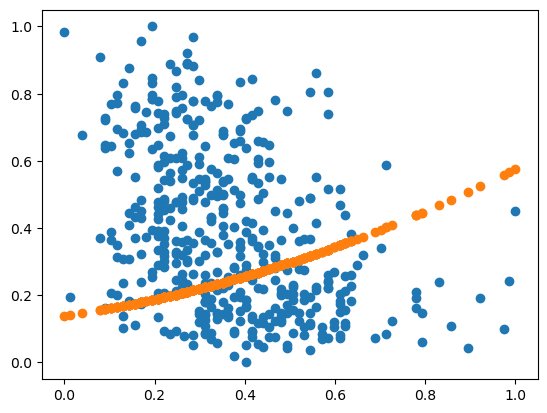

In [6]:
# Predicción inicial
plt.plot(X,Y,'o')
plt.plot(X,theta0+ theta1*X+theta2*X**2,'o') 
plt.show()

In [7]:
# Ajuste de parámetros - Aprendizaje DG
while i < maxItera:
    # Observar / evaluar
    yF = theta0 + theta1*X + theta2 * (X**2)
    E  = yF - Y
    
    # Actualizar
    nuevaT0 = theta0 - alpha * (1/m) * sum(E)
    nuevaT1 = theta1 - alpha * (1/m) * sum(E * X)
    nuevaT2 = theta2 - alpha * (1/m) * sum(E * X**2)
    
    theta0,theta1,theta2=nuevaT0,nuevaT1,nuevaT2
    log0=np.append(log0,theta0)
    log1=np.append(log1,theta1) 
    log2=np.append(log2,theta2) 
    logE=np.append(logE,sum(E**2)/(2*m))
        
    i+= 1  

In [8]:
[theta0 , theta1, theta2]

[0.6629202904773532, -0.9238834847161833, 0.4201798692722835]

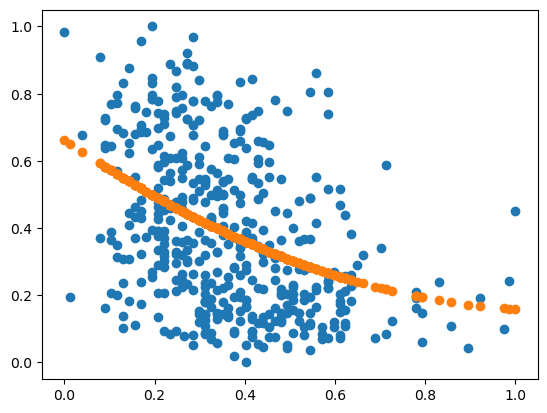

In [9]:
# Predicción final
plt.plot(X,Y,'o')
plt.plot(X,theta0+ theta1*X+theta2*X**2,'o') 
plt.show()

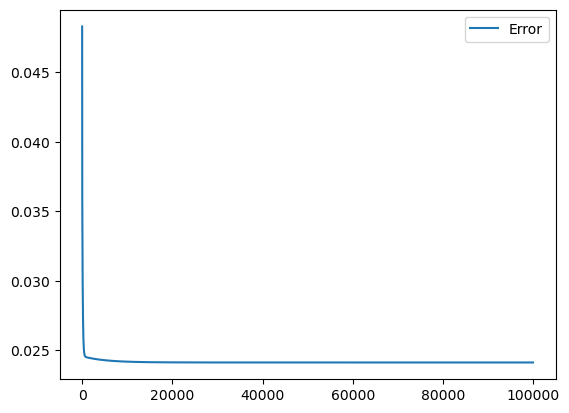

In [10]:
plt.plot(logE, label='Error')
plt.legend()
plt.show()

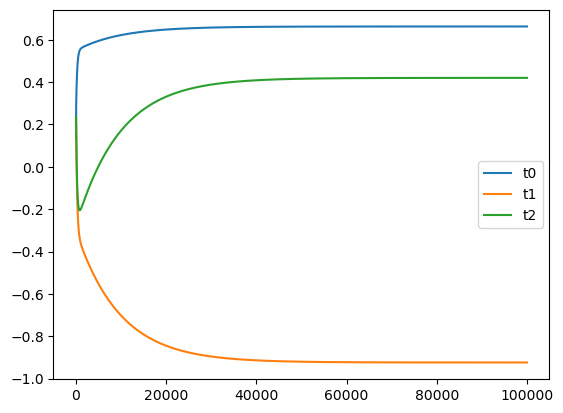

In [11]:
plt.plot(log0, label='t0')
plt.plot(log1, label='t1')
plt.plot(log2, label='t2')
plt.legend()
plt.show()

In [12]:
logE[-1]

0.024127157974686893

In [13]:
### Validando con sklearn
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
#xx = np.array(X) 
#yy = np.array(Y) 

xx = X.reshape(-1,1)
yy = Y.reshape(-1,1)

Xpoly = poly.fit_transform(xx)

modeloRL = linear_model.LinearRegression()
modeloRL.fit(Xpoly,yy)
print(" Modelo 1 Sklearn ")
print("theta0: ", modeloRL.intercept_)
print("theta1-2: ", modeloRL.coef_)


print(" Nuestro Modelo  ")
print("theta0: ", theta0)
print("theta1: ", theta1)
print("theta2: ", theta2)

 Modelo 1 Sklearn 
theta0:  [0.66292409]
theta1-2:  [[-0.92390422  0.42020316]]
 Nuestro Modelo  
theta0:  0.6629202904773532
theta1:  -0.9238834847161833
theta2:  0.4201798692722835


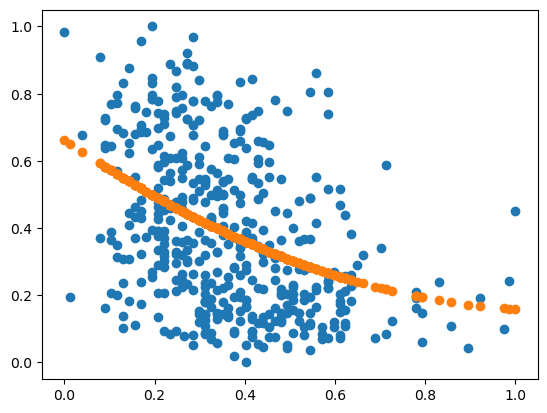

In [14]:
# Predicción scikit-learn
plt.plot(X,Y,'o')
plt.plot(X,modeloRL.intercept_ + modeloRL.coef_[0,0]*X + modeloRL.coef_[0,1]*X**2,'o') 
plt.show()